# Simple Linear Regression
#### 1 independent Feature (MKT) and 1 dependent Feature (PROFIT)

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")


In [2]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Estimate PROFIT based on MKT budget
### Perform scatterplot on Profit vs MKT

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns



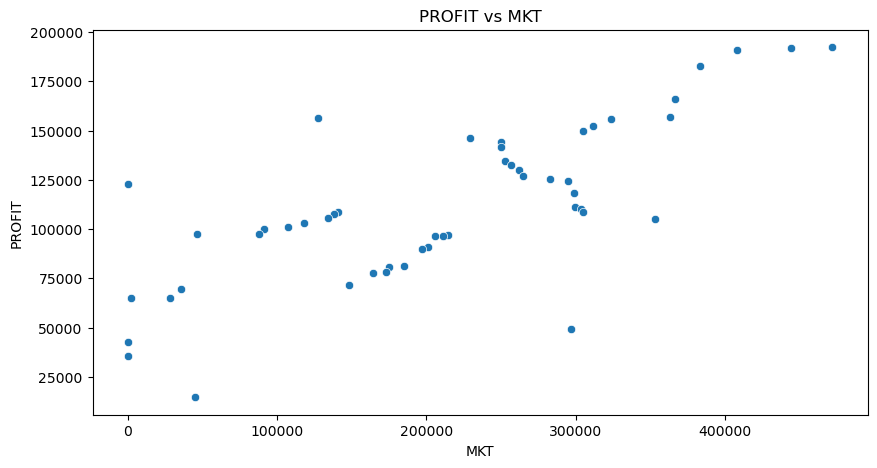

In [5]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = "MKT", y = "PROFIT")
plt.title("PROFIT vs MKT")
plt.show()

### Seperate X (MKT) and Y (PROFIT)


In [6]:
x = df[["MKT"]]
y = df[["PROFIT"]]

In [7]:
x.head()

,MKT
0,471784.10
1,443898.53
2,407934.54
3,383199.62
4,366168.42


In [8]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [9]:
x.values[0:5]

array([[471784.1 ],
       [443898.53],
       [407934.54],
       [383199.62],
       [366168.42]])

### Create the Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

### Get the Slope and Intercept

In [11]:
slope = model.coef_
intercept = model.intercept_
print(f"Slope : {slope},Intercept : {intercept}")

Slope : [[0.24645926]],Intercept : [60003.54881577]


### PROFIT = 60003.55 + 0.2465 * MKT

### out of sample prediction

In [12]:
mkt = 1_00_000
pred = model.predict([[mkt]])
print(f"Predicted profit :{pred}")

Predicted profit :[[84649.47526075]]


### Plot regression plot

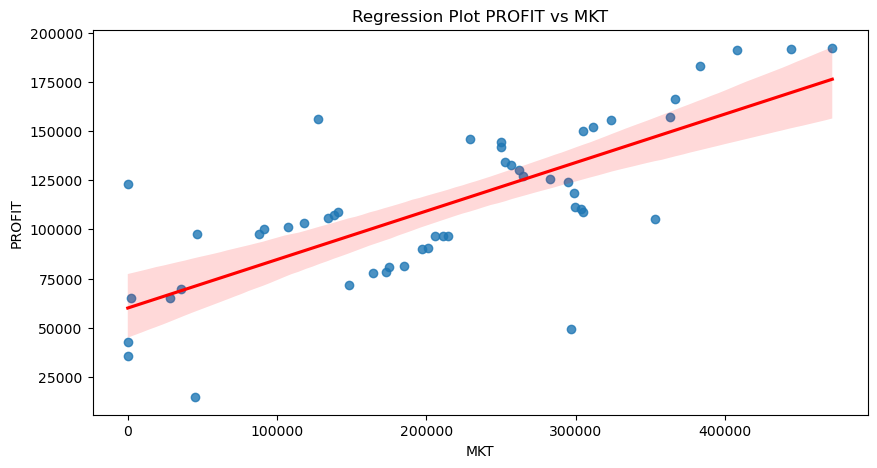

In [13]:
plt.figure(figsize=(10,5))
sns.regplot(data = df,x = "MKT", y = "PROFIT", line_kws = {"color": "red"})
plt.title("Regression Plot PROFIT vs MKT")
plt.show()

### Model Evaluation

##### 1. Mean Squared Error(MSE) 
##### 2. Root mean squared error(RMSE)
##### 3. Mean Absolute Error (MAE)
##### 4. Mean Absolute Percentage Error (MAPE)
##### 5. R2 score

In [14]:
ypred = model.predict(x)
ypred[0:5]

array([[176279.11108087],
       [169406.4540099 ],
       [160542.79548783],
       [154446.6452984 ],
       [150249.14827371]])

In [15]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error,r2_score
mse = mean_squared_error(y,ypred)
mae = mean_absolute_error(y,ypred)
rmse = mse**(1/2)
mape = mean_absolute_percentage_error(y,ypred)
r2score = r2_score(y,ypred)


In [19]:
print(f'''Mean Squared Error : {mse:.2f},
      Root Mean Squared Error : {rmse:.2f},
      Mean Absolute Error : {mae:.2f},
      Mean Absolute Percentage Error : {mape:.2f},
      R2 Score : {r2score:.2f}''')

Mean Squared Error : 701870011.20,
      Root Mean Squared Error : 26492.83,
      Mean Absolute Error : 21145.72,
      Mean Absolute Percentage Error : 0.29,
      R2 Score : 0.56


R2 Score-coefficient of correlation  is 0.56 which is not considered very good. This tells us that these data is not suitable for Linear Relationship. Hence we can not use it for future Prediction.